In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk
import seaborn as sns
#from gensim.models import word2vec
from tqdm import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr
import pandas as pd
import pickle
import csv


#pickle_file = open("RQ3_Input_Dataset2",'rb')
##--LDA File
## forTSNE_Data_Cleaned_08092020_083631.df
##forTSNE_Data_Cleaned_07092020_113759.df
##--Sentiment file
##FINAL_Dataset1_Pickle.data 
##FINAL_Dataset2_Pickle.data
##RQ3_Input_Dataset1.data
##RQ3_Input_Dataset2.data

df = pd.read_pickle("RQ3_Input_Dataset1.data")

In [3]:
pd.options.display.max_columns

20

In [4]:
df.head(5)

,Org,OrgSector,RverMonthYear,RverReviewer,RverPosition,RverLoc,RverRecom,RvReviewAbout,RvScore,RvComment,...,featureSentiScoreBool,featureSentiScorenormalized,RvScoreScaled,RvScoreWorkAtmosphereScaled,RvScoreCohesionAmongColleaguesScaled,RvScoreEqualRightsScaled,RvScoreDealingWithOlderColleaguesScaled,RvScoreEnvironmentalSocialAwarenessScaled,RvScoreWorkLifeBalanceScaled,Mean_value
1,Instone Real Estate Group AG,Immobilien,May 2020,1,Führungskraft / Management,Hat zum Zeitpunkt der Bewertung im Bereich Fin...,Empfohlen,Overall,4.9,Top Arbeitgeber mit vielen Benefiz Trans...,...,1.0,0.038507,0.98,1.0,0.8,1.0,1.0,1.0,1.0,4.842857
2,Instone Real Estate Group AG,Immobilien,May 2020,2,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich Rec...,Empfohlen,Overall,4.9,Vorbildlicher Arbeitgeber Nur die Mülltre...,...,0.0,-0.029961,0.98,1.0,1.0,1.0,1.0,0.8,1.0,4.842857
3,Instone Real Estate Group AG,Immobilien,May 2020,3,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich Adm...,Empfohlen,Overall,4.5,Wenn Transparenz und Wertschätzung aufeinande...,...,1.0,0.345304,0.90,1.0,1.0,4.7,1.0,4.7,0.8,4.700000
4,Instone Real Estate Group AG,Immobilien,October 2019,4,Ex-Angestellte/r oder Arbeiter/in,Hat im Bereich Personal / Aus- und Weiterbildu...,Nicht empfohlen,Overall,3.2,Anspruch und Wirklichkeit klaffen auseinander...,...,1.0,0.028910,0.64,0.6,0.6,0.6,0.8,0.4,0.6,3.028571
5,Instone Real Estate Group AG,Immobilien,October 2019,5,Führungskraft / Management,Hat zum Zeitpunkt der Bewertung bei Instone Re...,Empfohlen,Overall,4.8,Toller Arbeitgeber Tolle Truppe Auch bei lä...,...,1.0,0.012521,0.96,1.0,1.0,1.0,1.0,1.0,0.8,4.828571


In [5]:
pd.set_option('display.max_columns', None)
df.head()

,Org,OrgSector,RverMonthYear,RverReviewer,RverPosition,RverLoc,RverRecom,RvReviewAbout,RvScore,RvComment,RvScoreWorkAtmosphere,RvScoreCohesionAmongColleagues,RvScoreEqualRights,RvScoreDealingWithOlderColleagues,RvScoreEnvironmentalSocialAwareness,Corona1,Corona2,Corona3,RvScoreWorkLifeBalance,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,forTSNEYear,forTSNECity,topic0_max,topic1_max,topic2_max,topic3_max,topic4_max,topic5_max,topic6_max,topic7_max,topic8_max,topic9_max,topic10_max,topic11_max,topic12_max,topic13_max,topic14_max,topic15_max,topic16_max,topic17_max,score101,topicXmaxboolXcss0,topicXmaxboolXcss1,topicXmaxboolXcss2,topicXmaxboolXcss3,topicXmaxboolXcss4,topicXmaxboolXcss5,topicXmaxboolXcss6,topicXmaxboolXcss7,topicXmaxboolXcss8,topicXmaxboolXcss9,topicXmaxboolXcss10,topicXmaxboolXcss11,topicXmaxboolXcss12,topicXmaxboolXcss13,topicXmaxboolXcss14,topicXmaxboolXcss15,topicXmaxboolXcss16,topicXmaxboolXcss17,NewRverCategory,PreviousVsCurrentFlag,NewRverCategory_Employee,NewRverCategory_Management,NewRverCategory_Qualification,NewRverCategory_TemporaryEmployed,featureYear,state,featureState,featurePosition,featureOrg,featureRecom,featureSentiScoreBool,featureSentiScorenormalized,RvScoreScaled,RvScoreWorkAtmosphereScaled,RvScoreCohesionAmongColleaguesScaled,RvScoreEqualRightsScaled,RvScoreDealingWithOlderColleaguesScaled,RvScoreEnvironmentalSocialAwarenessScaled,RvScoreWorkLifeBalanceScaled,Mean_value
1,Instone Real Estate Group AG,Immobilien,May 2020,1,Führungskraft / Management,Hat zum Zeitpunkt der Bewertung im Bereich Fin...,Empfohlen,Overall,4.9,Top Arbeitgeber mit vielen Benefiz Trans...,5.0,4.0,5.0,5.0,5.0,NA,NA,NA,5.0,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.392857,0.035714,0.035714,0.035714,2020,Erlangen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.3266,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.128307,0.0,0.0,0.0,Management,1,0,1,0,0,1.00,Bayern,0.12,0.79,0.4762,1.0,1.0,0.038507,0.98,1.0,0.8,1.0,1.0,1.0,1.0,4.842857
2,Instone Real Estate Group AG,Immobilien,May 2020,2,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich Rec...,Empfohlen,Overall,4.9,Vorbildlicher Arbeitgeber Nur die Mülltre...,5.0,5.0,5.0,5.0,4.0,NA,NA,NA,5.0,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.392857,0.035714,0.035714,0.035714,2020,Essen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-0.2177,-0.0,-0.0,-0.0,-0.0,-0.0,-0.00000,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,-0.0,-0.085525,-0.0,-0.0,-0.0,Employee,1,1,0,0,0,1.00,Niedersachsen,0.53,0.07,0.4762,1.0,0.0,-0.029961,0.98,1.0,1.0,1.0,1.0,0.8,1.0,4.842857
3,Instone Real Estate Group AG,Immobilien,May 2020,3,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich Adm...,Empfohlen,Overall,4.5,Wenn Transparenz und Wertschätzung aufeinande...,5.0,5.0,4.7,5.0,4.7,NA,NA,NA,4.0,0.141890,0.000000,0.000000,0.000000,0.000000,0.000000,0.337175,0.000000,0.141891,0.000000,0.000000,0.000000,0.000000,0.141893,0.000000,0.000000,0.081744,0.074325,2020,Köln,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2.9287,0.0,0.0,0.0,0.0,0.0,0.00000,0.987484,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Employee,1,1,0,0,0,1.00,Nordrhein-Westfalen,0.59,0.07,0.4762,1.0,1.0,0.345304,0.90,1.0,1.0,4.7,1.0,4.7,0.8,4.700000
4,Instone Real Estate Group AG,Immobilien,October 2019,4,Ex-Angestellte/r oder Arbeiter/in,Hat im Bereich Personal / Aus- und Weiterbildu...,Nicht empfohlen,Overall,3.2,Anspruch und Wirklichkeit klaffen auseinander...,3.0,3.0,3.0,4.0,2.0,NA,NA,NA,3.0,0.000000,0.224638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.224632,0.086750,0.290055,0.000000,0.000000,0.000000,0.000000,0.079710,0.000000,2019,Essen,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.2452,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0

In [4]:
df.OrgSector.unique()

array(['Immobilien', 'Elektro/Elektronik', 'Sonstige Branchen',
       'Maschinenbau', 'Handel', 'Internet', 'Medizin/Pharma', 'IT',
       'Automobil', 'Industrie', 'Dienstleistung', 'Energie',
       'Marketing/Werbung/PR', 'Nahrungsmittel/Landwirtschaft', 'Chemie',
       'Finanz', 'Banken', 'Transport/Verkehr/Logistik',
       'Telekommunikation', 'Bau/Architektur', 'Versicherung',
       'Kunst/Kultur', 'Textil', ' Immobilien', 'Medien',
       'Personalwesen & -beschaffung', ' Industrie', 'Sport/Beauty',
       'Druck/Verpackung', 'Medizintechnik', 'Forschung/Entwicklung',
       'Beratung/Consulting'], dtype=object)

#### Assign sectors - generic names

In [6]:
conditions = [(df["OrgSector"] == 'Immobilien'),
              (df["OrgSector"] == 'Elektro/Elektronik'),
              (df["OrgSector"] == 'Sonstige Branchen'),
              (df["OrgSector"] == 'Maschinenbau'),
              (df["OrgSector"] == 'Handel'),
              (df["OrgSector"] == 'Internet'),
              (df["OrgSector"] == 'Medizin/Pharma'),
              (df["OrgSector"] == 'IT'),
              (df["OrgSector"] == 'Automobil'),
              (df["OrgSector"] == 'Industrie'),
              (df["OrgSector"] == 'Dienstleistung'),
              (df["OrgSector"] == 'Energie'),
              (df["OrgSector"] == 'Marketing/Werbung/PR'),
              (df["OrgSector"] == 'Nahrungsmittel/Landwirtschaft'),              
              (df["OrgSector"] == 'Chemie'),
              (df["OrgSector"] == 'Finanz'),
              (df["OrgSector"] == 'Banken'),
              (df["OrgSector"] == 'Transport/Verkehr/Logistik'),
              (df["OrgSector"] == 'Telekommunikation'),
              (df["OrgSector"] == 'Bau/Architektur'),
              (df["OrgSector"] == 'Versicherung'),
              (df["OrgSector"] == 'Kunst/Kultur'),
              (df["OrgSector"] == 'Textil'),
              (df["OrgSector"] == ' Immobilien'),
              (df["OrgSector"] == 'Medien'),
              (df["OrgSector"] == 'Personalwesen & -beschaffung'),
              (df["OrgSector"] == ' Industrie'),
              (df["OrgSector"] == 'Sport/Beauty'),
              (df["OrgSector"] == 'Druck/Verpackung'),
              (df["OrgSector"] == 'Medizintechnik'),
              (df["OrgSector"] == 'Forschung/Entwicklung'),
              (df["OrgSector"] == 'Beratung/Consulting')
              ]
choices_NewOrgSector = ['Finance, Insurance, Real Estate', 'Manufacturing', 'Others', 'Manufacturing', 'Retail Trade',
                        'Services','Manufacturing','Manufacturing','Manufacturing','Manufacturing','Services',
                        'Transportation & Public Utilities','Services','Agriculture, Forestry, Fishing','Manufacturing',
                        'Finance, Insurance, Real Estate','Finance, Insurance, Real Estate','Transportation & Public Utilities',
                        'Transportation & Public Utilities','Construction','Finance, Insurance, Real Estate','Services',
                        'Manufacturing','Finance, Insurance, Real Estate','Services','Services','Manufacturing',
                        'Services','Manufacturing','Manufacturing','Services','Services']
df["NewOrgSector"] = np.select(conditions, choices_NewOrgSector, default='NaN')

In [7]:
df.columns

Index(['Org', 'OrgSector', 'RverMonthYear', 'RverReviewer', 'RverPosition',
       'RverLoc', 'RverRecom', 'RvReviewAbout', 'RvScore', 'RvComment',
       'RvScoreWorkAtmosphere', 'RvScoreCohesionAmongColleagues',
       'RvScoreEqualRights', 'RvScoreDealingWithOlderColleagues',
       'RvScoreEnvironmentalSocialAwareness', 'Corona1', 'Corona2', 'Corona3',
       'RvScoreWorkLifeBalance', 'topic0', 'topic1', 'topic2', 'topic3',
       'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10',
       'topic11', 'topic12', 'topic13', 'topic14', 'topic15', 'topic16',
       'topic17', 'forTSNEYear', 'forTSNECity', 'topic0_max', 'topic1_max',
       'topic2_max', 'topic3_max', 'topic4_max', 'topic5_max', 'topic6_max',
       'topic7_max', 'topic8_max', 'topic9_max', 'topic10_max', 'topic11_max',
       'topic12_max', 'topic13_max', 'topic14_max', 'topic15_max',
       'topic16_max', 'topic17_max', 'score101', 'topicXmaxboolXcss0',
       'topicXmaxboolXcss1', 'topicXmaxboolXcss

In [8]:
df['NewOrgSector'].value_counts()

Manufacturing                        11091
Transportation & Public Utilities     3221
Services                              2808
Finance, Insurance, Real Estate       2514
Retail Trade                          1044
Others                                 153
Construction                            94
Agriculture, Forestry, Fishing          72
Name: NewOrgSector, dtype: int64

#### Fragmentation of dataframe, sectorwise

In [8]:
df_Manufacturing = df[df['NewOrgSector'] == 'Manufacturing']
df_Transportation = df[df['NewOrgSector'] == 'Transportation & Public Utilities']
df_Services = df[df['NewOrgSector'] == 'Services']
df_Finance = df[df['NewOrgSector'] == 'Finance, Insurance, Real Estate']
df_Retail  = df[df['NewOrgSector'] == 'Retail Trade']
df_Others = df[df['NewOrgSector'] == 'Others']
df_Construction = df[df['NewOrgSector'] == 'Construction']
df_Agriculture = df[df['NewOrgSector'] == 'Agriculture, Forestry, Fishing']

listOfDataframe = [df_Manufacturing, df_Transportation, df_Services, df_Finance, df_Retail, df_Others, df_Construction, df_Agriculture]
#gapminder_2002 = gapminder[gapminder['year']==2002]

In [9]:
def calculate_pValue(df_Manufacturing, df_Construction):
    df_Construction =df_Construction.loc[:,'RvScore']
    #params = np.append(lm.intercept, lm.coef)
    #predictions = lm.predict(train_x_)
    
    dfnewX = pd.DataFrame({"Constant": np.ones(len(df_Manufacturing))}).join(pd.DataFrame(df_Manufacturing))
    MSE = (sum((df_Construction - predictions) ** 2)) / (len(dfnewX) - len(dfnewX.columns))

    # Note if you don't want to use a DataFrame replace the two lines above with
    # newX = np.append(np.ones((len(X),1)), X, axis=1)
    # MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

    #var_b = variance
    print("---------------dfnewX-----------------")
    print(dfnewX)
    var_b = MSE * (np.linalg.inv(np.dot(dfnewX.T, dfnewX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b
    print("==(len(dfnewX) - len(dfnewX[0])== :: ", (len(dfnewX) - 1))
    p_values = [2 * (1 - stats.t.cdf(np.abs(i), (len(dfnewX) - 1))) for i in ts_b]


    sd_b = np.round(sd_b, 3)
    ts_b = np.round(ts_b, 3)
    p_values = np.round(p_values, 3)
    params = np.round(params, 4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"], myDF3["Standard Errors"], myDF3["tvalues"], myDF3["Probabilities"] = [params, sd_b, ts_b,
                                                                                                  p_values]
    #print(myDF3)
    return myDF3.loc[1:, "Probabilities"], myDF3.loc[1:, "tvalues"]

In [10]:
pd.set_option('display.max_columns', None)
df_Manufacturing.head()

,Org,OrgSector,RverMonthYear,RverReviewer,RverPosition,RverLoc,RverRecom,RvReviewAbout,RvScore,RvComment,RvScoreWorkAtmosphere,RvScoreCohesionAmongColleagues,RvScoreEqualRights,RvScoreDealingWithOlderColleagues,RvScoreEnvironmentalSocialAwareness,Corona1,Corona2,Corona3,RvScoreWorkLifeBalance,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15,topic16,topic17,forTSNEYear,forTSNECity,topic0_max,topic1_max,topic2_max,topic3_max,topic4_max,topic5_max,topic6_max,topic7_max,topic8_max,topic9_max,topic10_max,topic11_max,topic12_max,topic13_max,topic14_max,topic15_max,topic16_max,topic17_max,score101,topicXmaxboolXcss0,topicXmaxboolXcss1,topicXmaxboolXcss2,topicXmaxboolXcss3,topicXmaxboolXcss4,topicXmaxboolXcss5,topicXmaxboolXcss6,topicXmaxboolXcss7,topicXmaxboolXcss8,topicXmaxboolXcss9,topicXmaxboolXcss10,topicXmaxboolXcss11,topicXmaxboolXcss12,topicXmaxboolXcss13,topicXmaxboolXcss14,topicXmaxboolXcss15,topicXmaxboolXcss16,topicXmaxboolXcss17,NewRverCategory,PreviousVsCurrentFlag,NewRverCategory_Employee,NewRverCategory_Management,NewRverCategory_Qualification,NewRverCategory_TemporaryEmployed,featureYear,state,featureState,featurePosition,featureOrg,featureRecom,featureSentiScoreBool,featureSentiScorenormalized,RvScoreScaled,RvScoreWorkAtmosphereScaled,RvScoreCohesionAmongColleaguesScaled,RvScoreEqualRightsScaled,RvScoreDealingWithOlderColleaguesScaled,RvScoreEnvironmentalSocialAwarenessScaled,RvScoreWorkLifeBalanceScaled,Mean_value,NewOrgSector
19,Isra Vision AG,Elektro/Elektronik,May 2020,1,Ex-Angestellte/r oder Arbeiter/in,Hat bei ISRA Vision AG in Darmstadt gearbeitet.,Nicht empfohlen,Overall,2.2,Sehr unangenehmer Arbeitgeber Sehr unangenehm...,1.0,2.0,1.0,3.0,3.0,NA,NA,NA,2.0,0.012821,0.141025,0.012821,0.012821,0.012822,0.012821,0.269232,0.012821,0.012821,0.012822,0.012821,0.141024,0.012821,0.012821,0.269228,0.012821,0.012821,0.012821,2020,Darmstadt,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.4049,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.378244,-0.0,-0.0,-0.0,-0.00000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000,Employee,0,1,0,0,0,1.00,Hessen,0.41,0.21,0.483,0.0,0.0,-0.193350,0.44,0.2,0.4,0.2,0.6,0.6,0.4,2.028571,Manufacturing
20,Isra Vision AG,Elektro/Elektronik,January 2020,3,Ex-Angestellte/r oder Arbeiter/in,Hat im Bereich Administration / Verwaltung bei...,Nicht empfohlen,Overall,1.3,autoritärer Führungsstil - keine Veränderungs...,1.0,2.0,1.0,1.0,2.0,NA,NA,NA,1.0,0.026321,0.026316,0.026316,0.026316,0.026316,0.026323,0.026316,0.026316,0.026316,0.026316,0.552585,0.026316,0.026317,0.026318,0.026343,0.026318,0.026316,0.026316,2020,Darmstadt,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0040,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00221,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Employee,0,1,0,0,0,1.00,Hessen,0.41,0.21,0.483,0.0,1.0,0.000472,0.26,0.2,0.4,0.2,0.2,0.4,0.2,1.328571,Manufacturing
21,Isra Vision AG,Elektro/Elektronik,October 2018,7,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung bei Isra Visio...,Nicht empfohlen,Overall,2.3,Sehr spezieller Arbeitgeber. Mit Vorsicht zu ...,2.0,4.0,2.0,3.0,2.0,NA,NA,NA,2.0,0.017241,0.017241,0.017241,0.017241,0.189656,0.017241,0.017241,0.017241,0.017241,0.017241,0.017241,0.017244,0.017241,0.189652,0.189655,0.017241,0.189654,0.017241,2018,Darmstadt,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5167,0.0,0.0,0.000000,0.0,0.097995,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Employee,1,1,0,0,0,0.83,Hessen,0.41,0.07,0.483,0.0,1.0,0.060921,0.46,0.4,0.8,0.4,0.6,0.4,0.4,2.471429,Manufacturing
22,Isra Vision AG,Elektro/Elektronik,January 2018,8,Angestellte/r oder Arbeiter/in,Hat zum Zeitpunkt der Bewertung im Bereich For...,Empfohlen,Overall,4.6,Super Unternehmen 1. Kollegen Top 2. Interess...,5.0,5.0,5.0,5.0,5.0,NA,NA,NA,3.0,0.161765,0.014706,0.161765,0.014706,0.014706,0.014709,0.014706,0.014727,0.161759,0.014706,0.014708,0.014710,0.014706,0.014706,0.014706,0.014706,0.014711,0.308792,2018,Herten,0,0,0,0,0,0,0

In [11]:
#arr = df.to_numpy()
arr_df_Manufacturing_topic0 = df_Manufacturing["topic0"].to_numpy()
arr_df_Manufacturing_topic0

array([0.0128206 , 0.02632147, 0.01724143, ..., 0.        , 0.02083407,
       0.01724144])

#### Convert to numpy array - input for t-test function

In [12]:
#arr = df.to_numpy()

arr_df_Services_topic0 = df_Services["topic0"].to_numpy()
arr_df_Services_topic0

array([0.0128206 , 0.01724147, 0.08467849, ..., 0.03571429, 0.01470593,
       0.3928569 ])

In [13]:
# Use scipy.stats.ttest_ind_from_stats.
stats.ttest_ind(arr_df_Manufacturing_topic0, arr_df_Services_topic0)


Ttest_indResult(statistic=1.5503102468831935, pvalue=0.1210898403857845)

#### Function to assign (*) to p-values

In [14]:
def starTeller(_value):
    if _value == 0:
        return '*****'
    if _value > 0 and _value <=0.001:
        return '****'
    if _value > 0.001 and _value <=0.01:
        return '***'
    if _value > 0.01 and _value <=0.05:
        return '**'
    if _value > 0.05 and _value <=0.1:
        return '*'
    if _value > 0.1:
        return '.'

In [15]:
dfcolumns = ['Sectors','Manufacturing', 'Transportation', 'Services', 'Finance', 'Retail', 'Others', 'Construction', 'Agriculture']

x_axis_labels = dfcolumns[1:]
x_axis_labels

['Manufacturing',
 'Transportation',
 'Services',
 'Finance',
 'Retail',
 'Others',
 'Construction',
 'Agriculture']

#### t-test function block, outputs data into excel and generates heatmap

no of topics :: 18
====================New CSV==================
0
====================New CSV==================
1
====================New CSV==================
2
====================New CSV==================
3
====================New CSV==================
4
====================New CSV==================
5
====================New CSV==================
6
====================New CSV==================
7
====================New CSV==================
8
====================New CSV==================
9
====================New CSV==================
10
====================New CSV==================
11
====================New CSV==================
12
====================New CSV==================
13
====================New CSV==================
14
====================New CSV==================
15
====================New CSV==================
16
====================New CSV==================
17


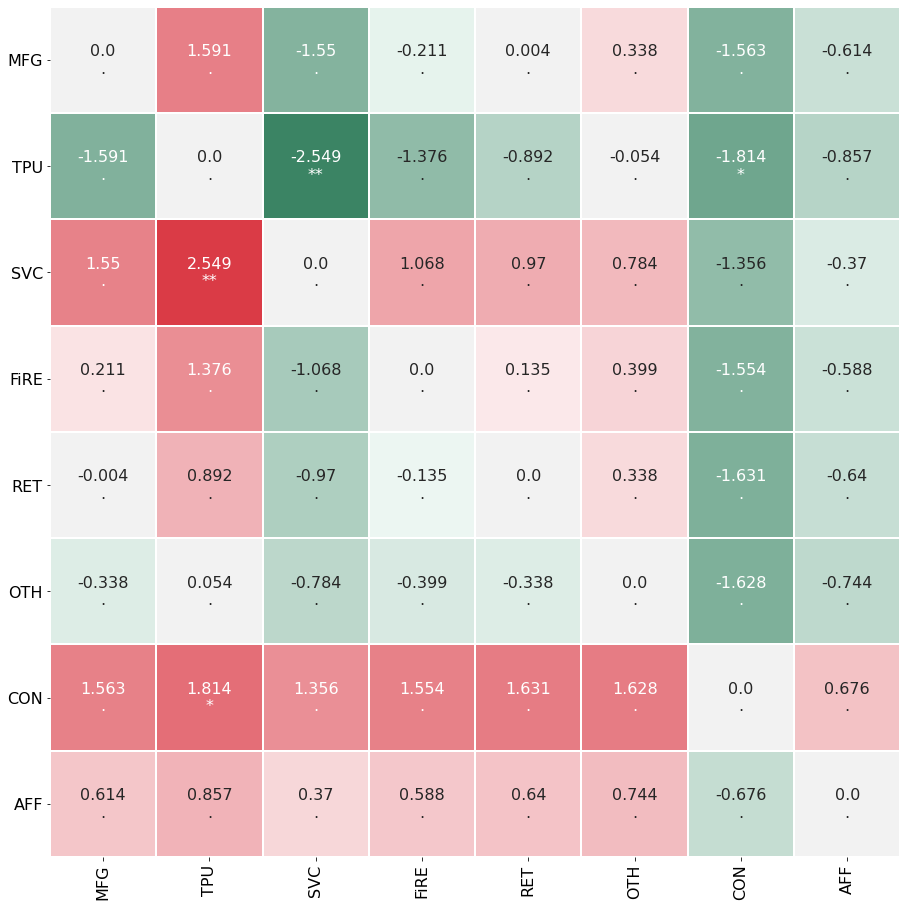

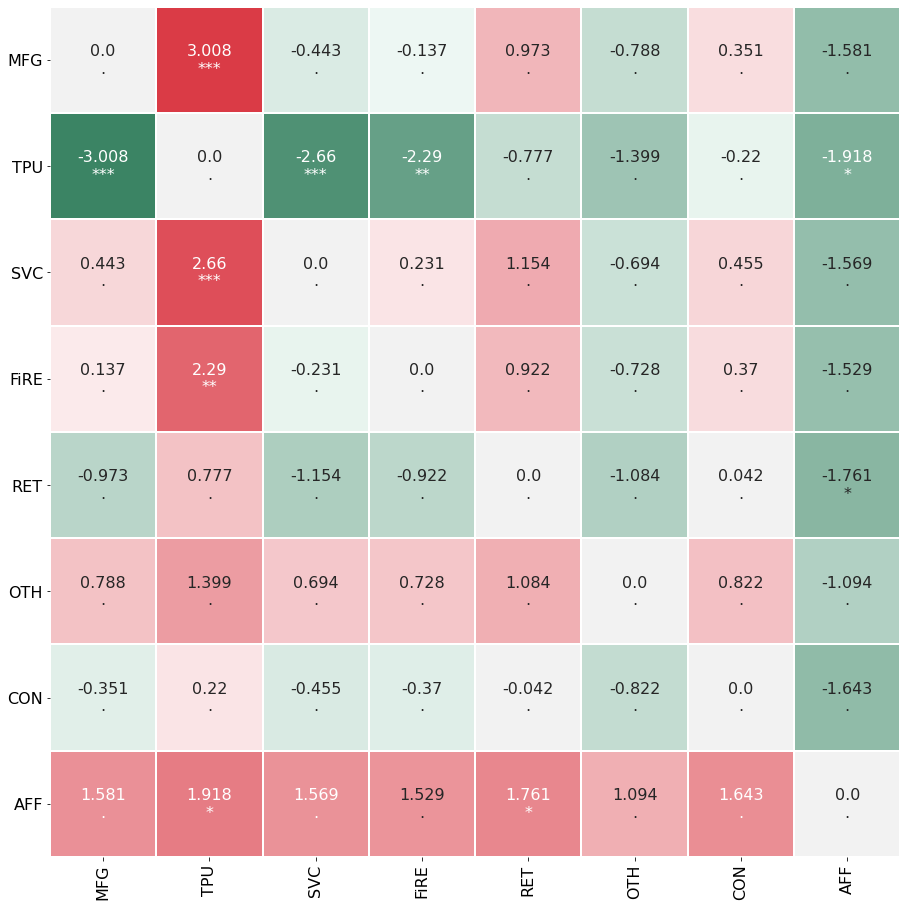

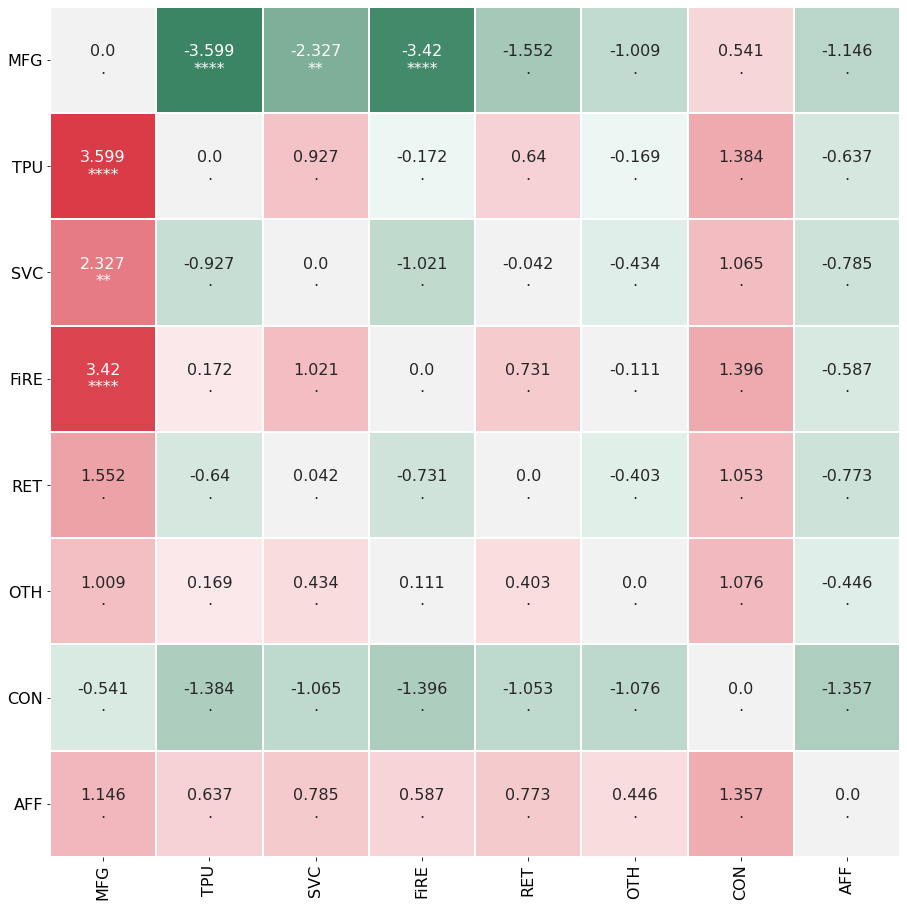

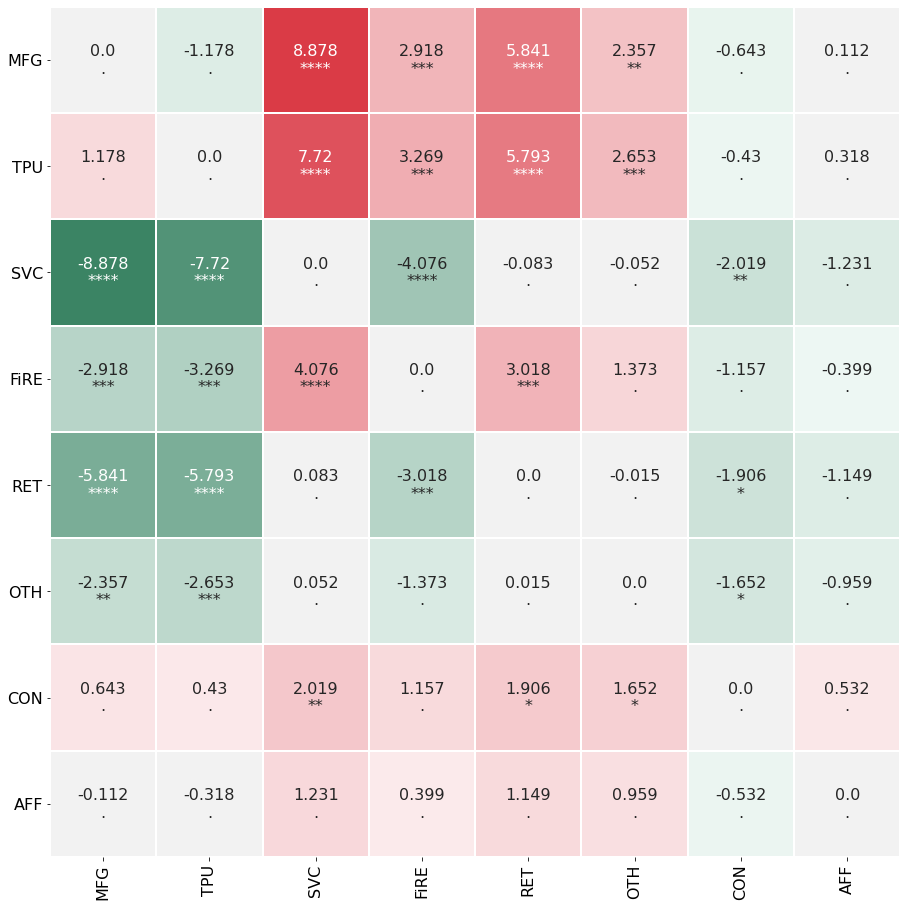

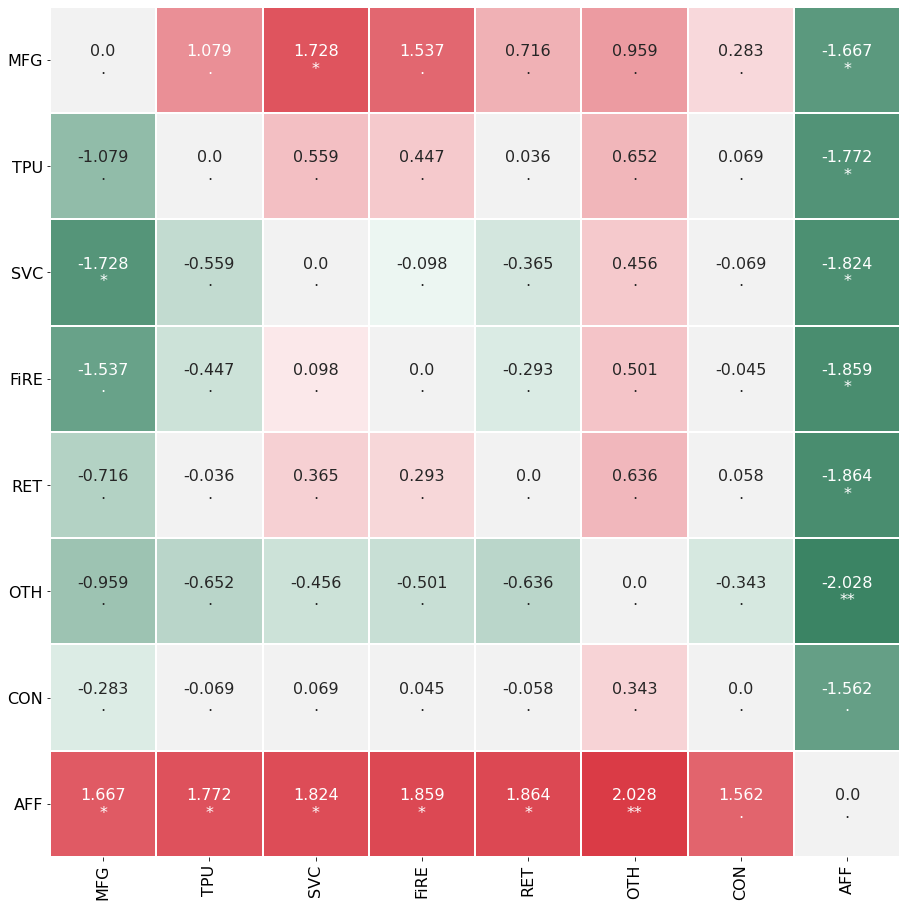

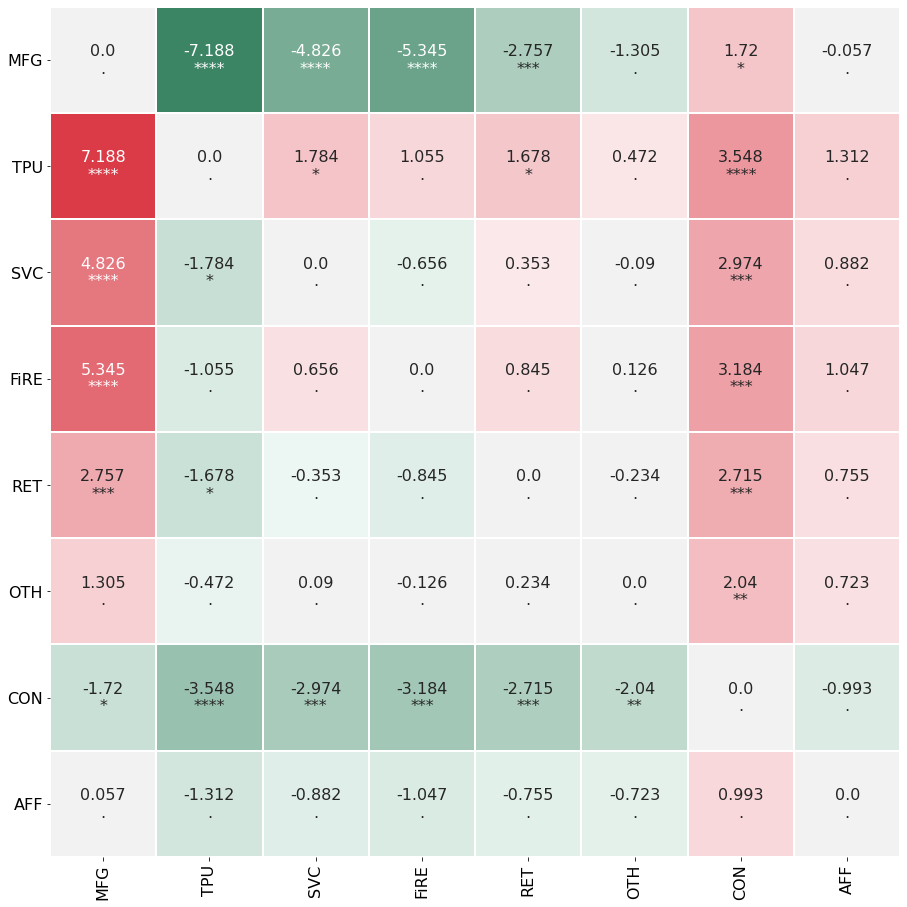

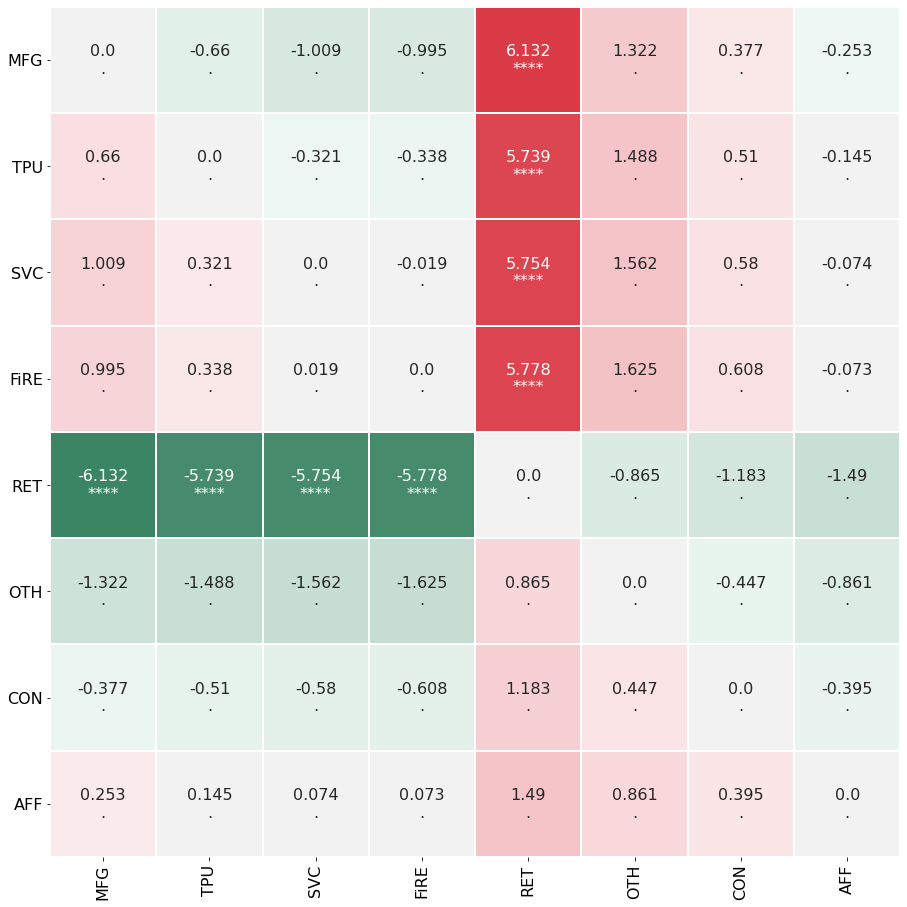

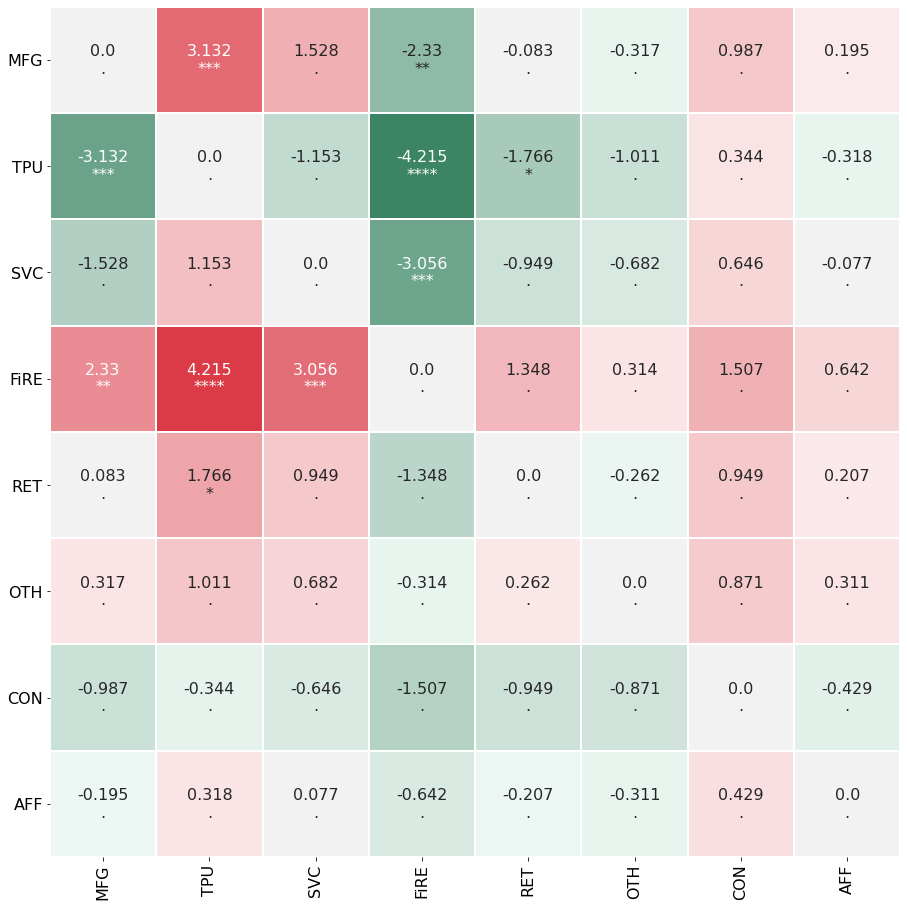

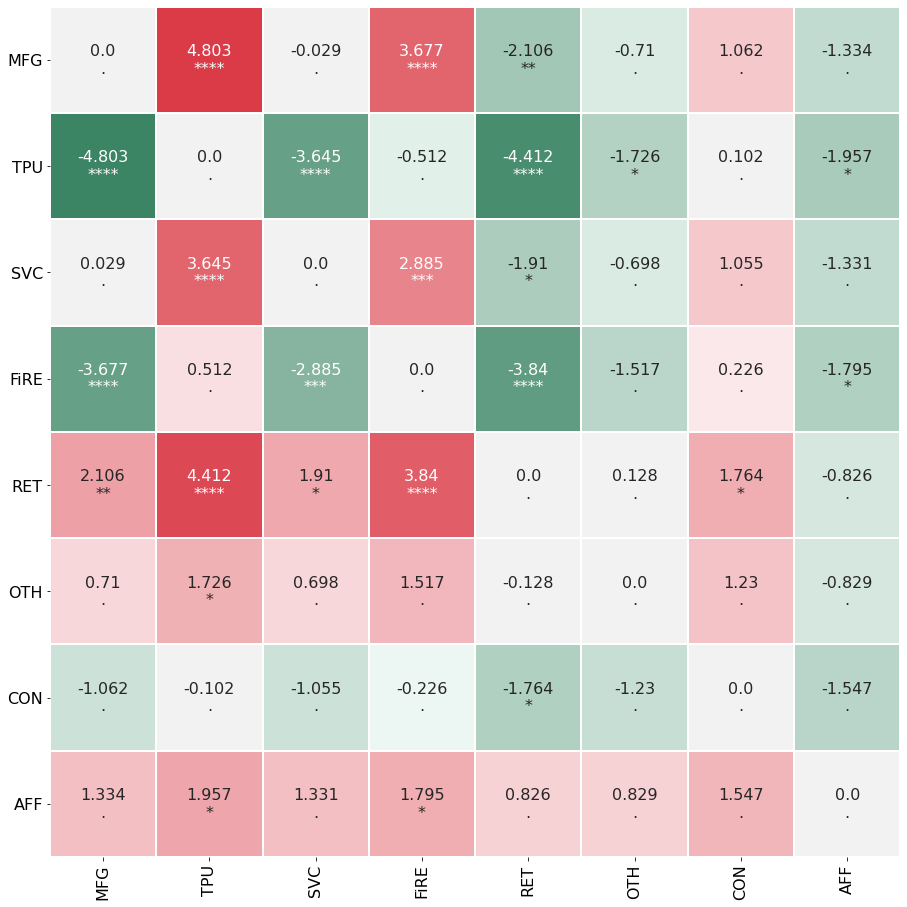

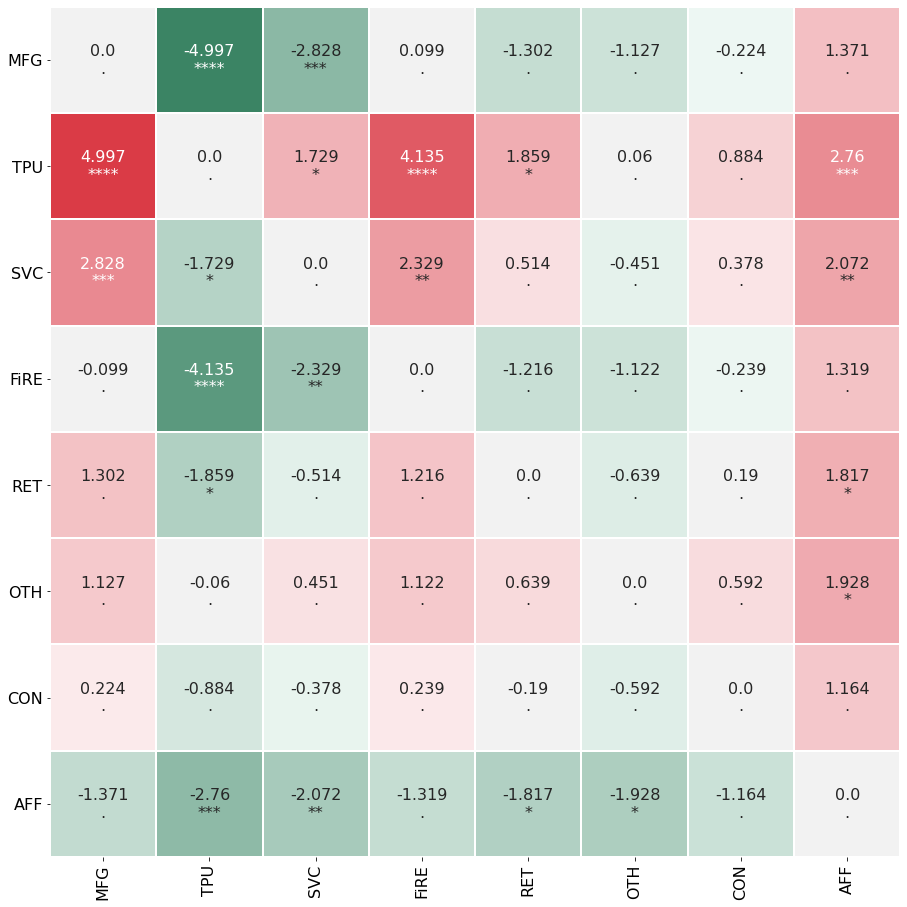

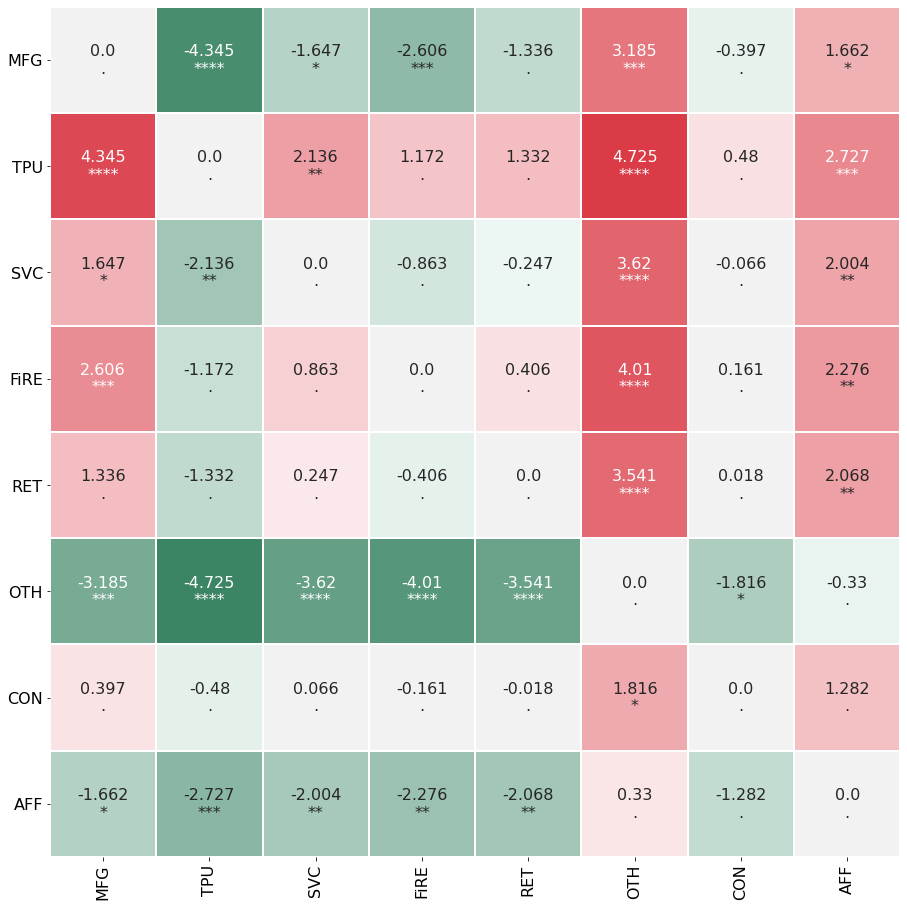

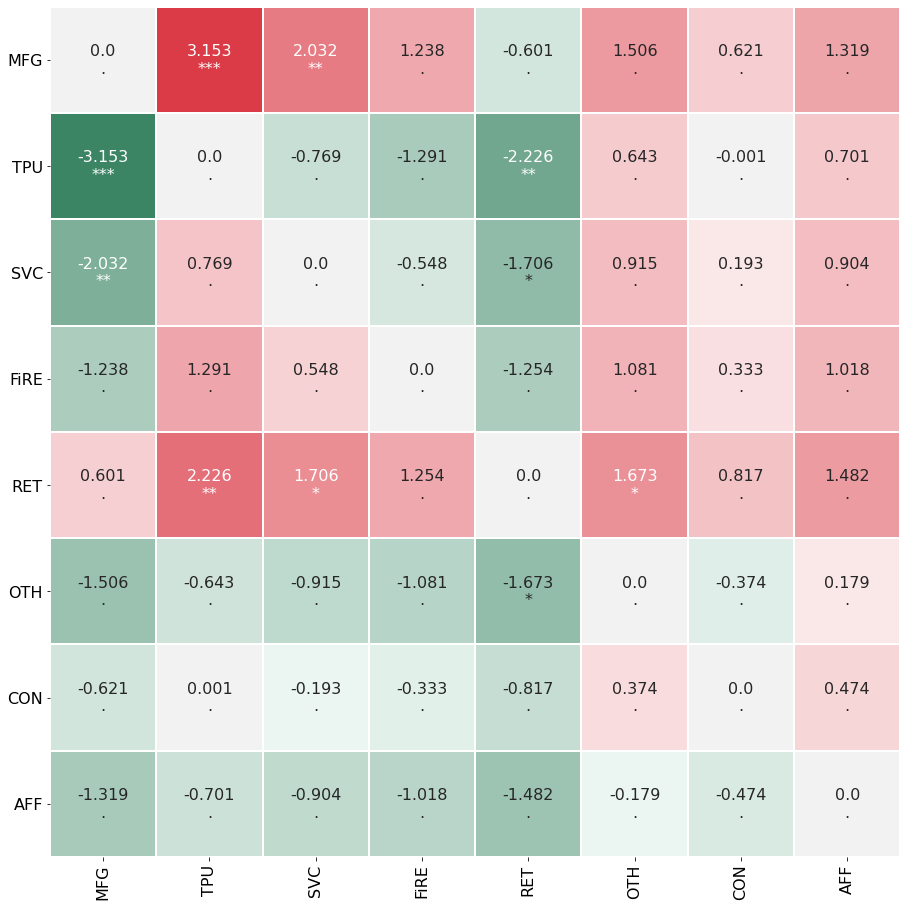

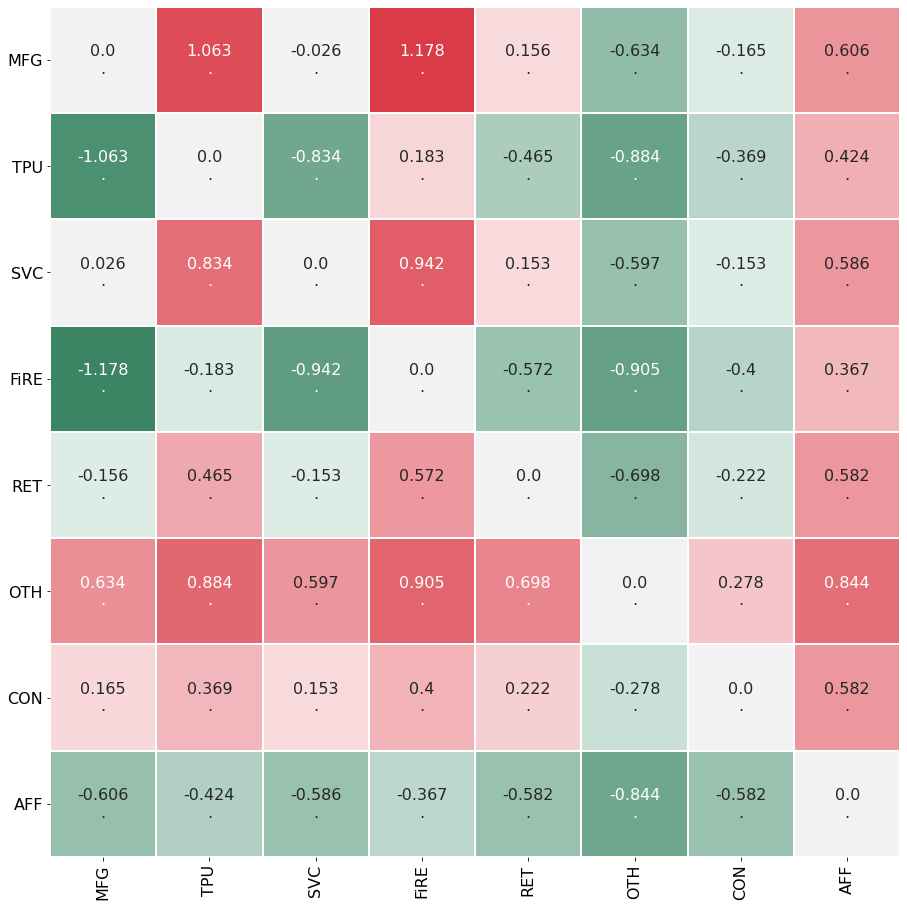

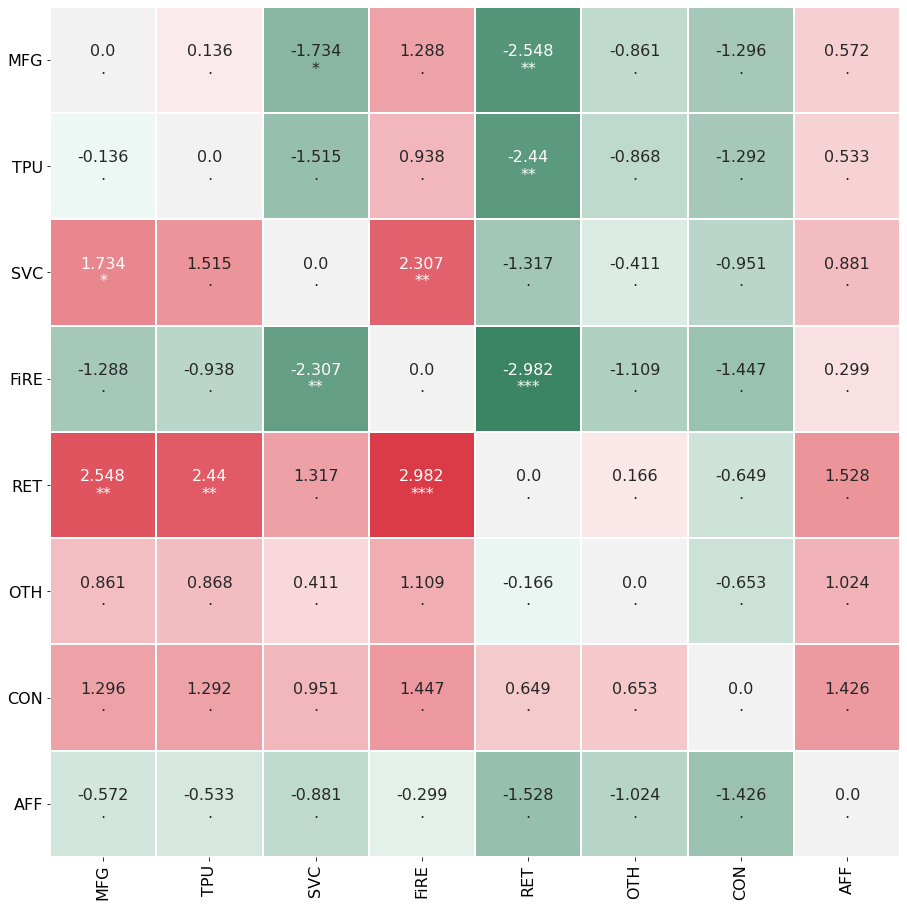

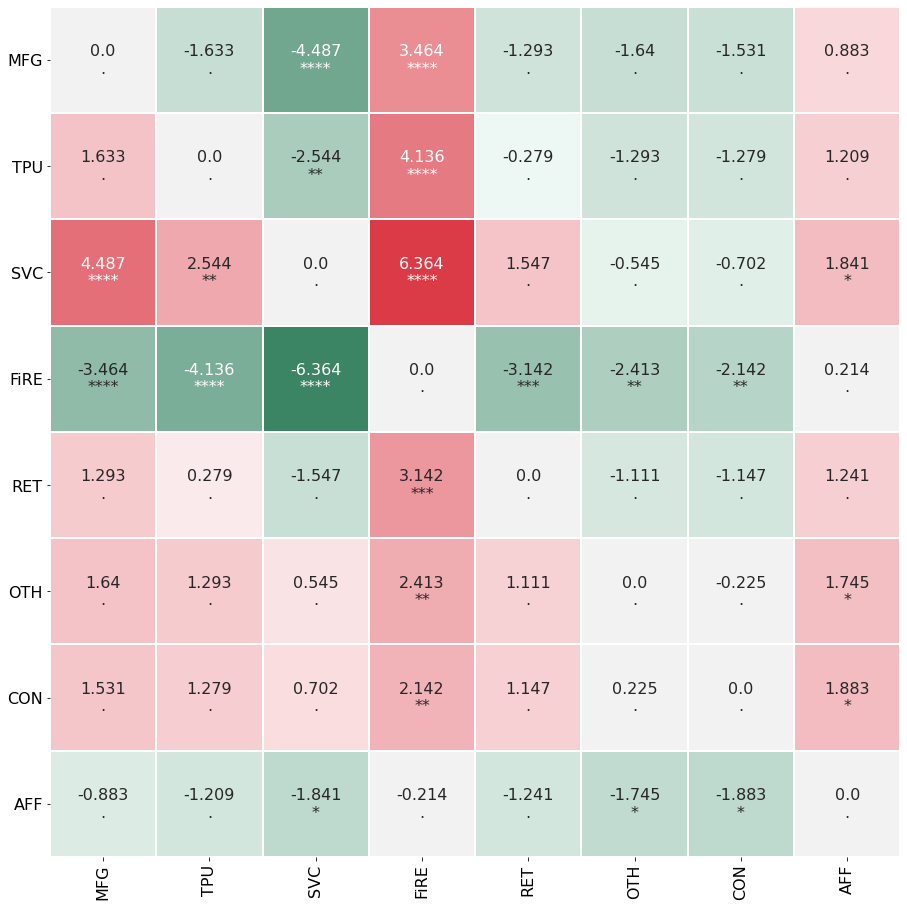

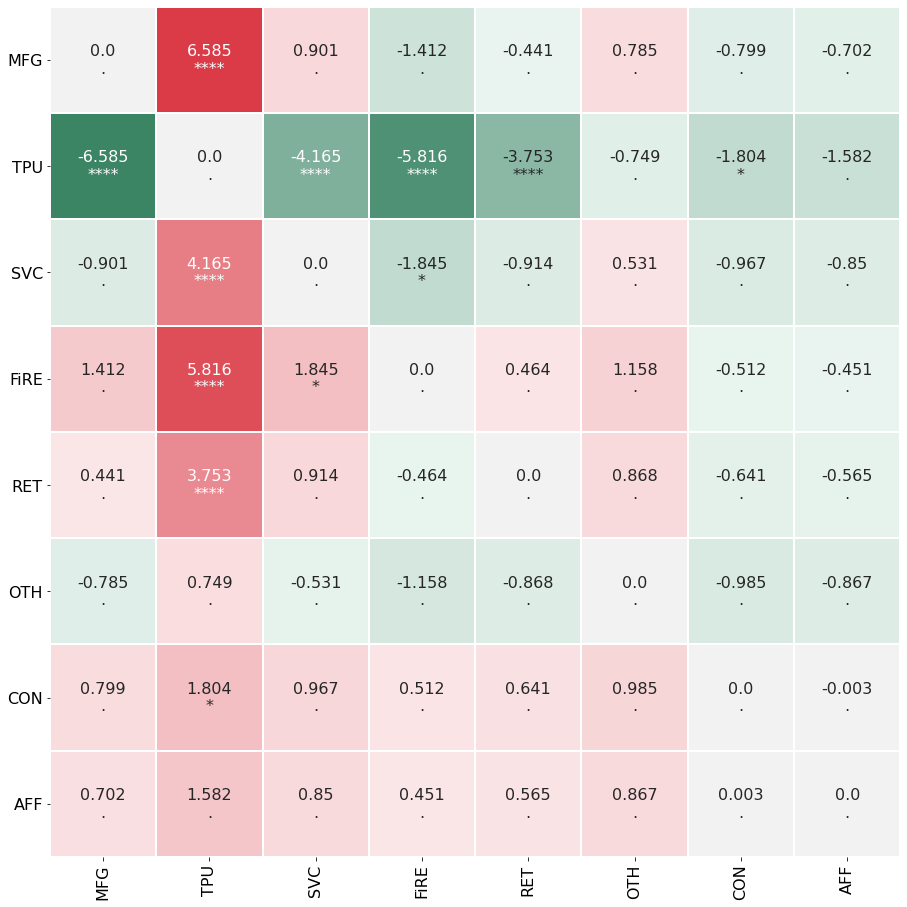

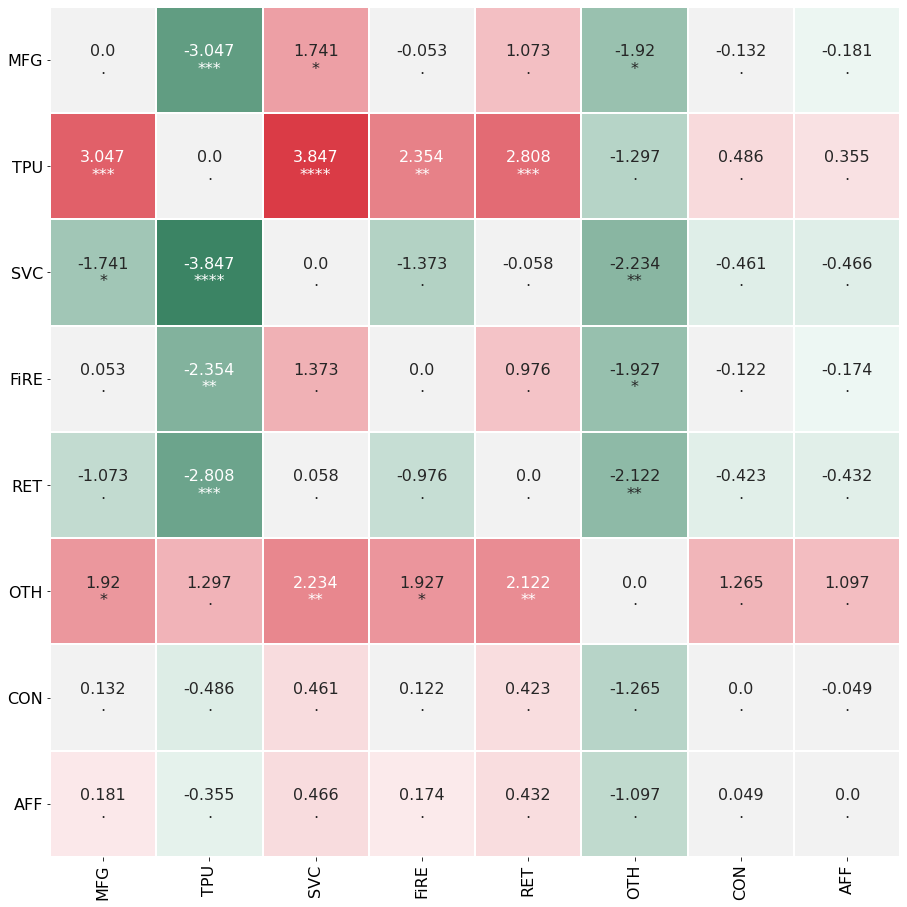

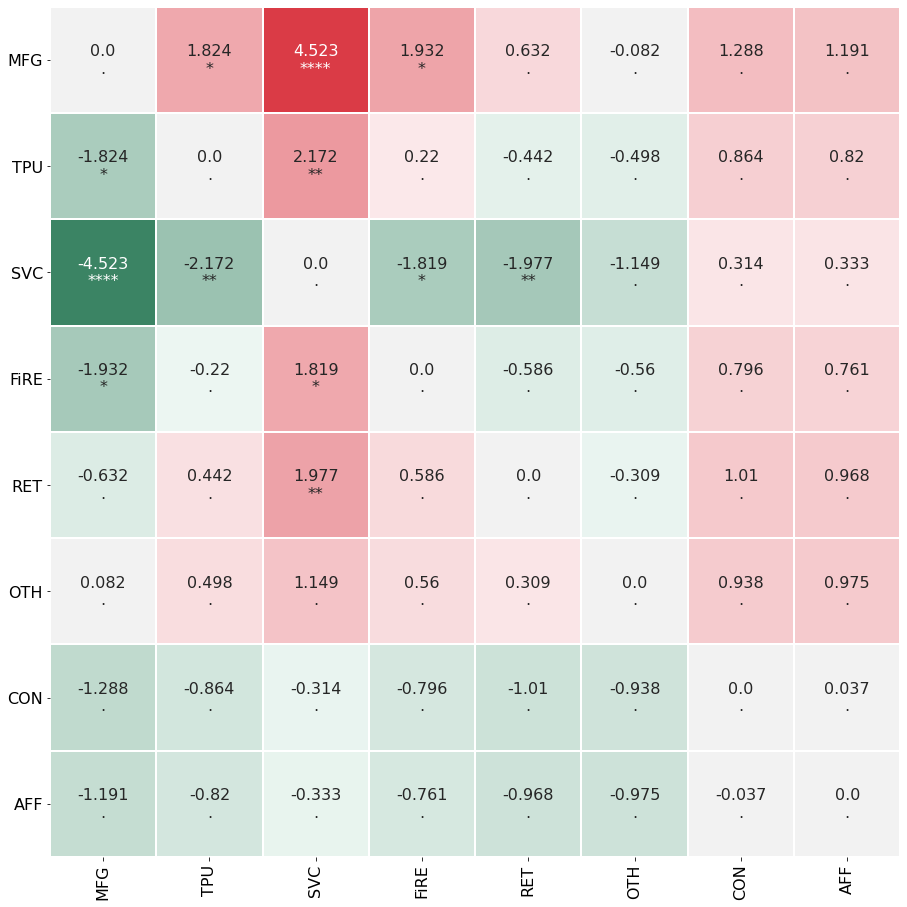

In [16]:
noOfTopics = 0
#dfcolumns = ['Manufacturing', 'Transportation', 'Services', 'Finance', 'Retail', 'Others', 'Construction', 'Agriculture']
dfcolumns = ['Sectors','MFG', 'TPU', 'SVC', 'FiRE', 'RET', 'OTH', 'CON', 'AFF']

#Dictionary topic number and name
dictOne = {'topic0': 'bad companies','topic1': 'job pressure','topic2': 'work atmosphere - interesting tasks','topic3': 'cohesion among colleagues',
           'topic4': 'treatment of colleagues','topic5': 'equal rights','topic6': 'work life balance','topic7': 'treatment of leader',
           'topic8': 'communication in the organization','topic9': 'flexible work hours','topic10': 'circumstances at work - overtime',
           'topic11': 'age diversity','topic12': 'vacation','topic13': 'work from home',
           'topic14': 'good management','topic15': 'work hours','topic16': 'work atmosphere','topic17': 'work atmosphere for new colleagues'}

#Agriculture Forestry Fishing,Construction,Finance Insurance Real Estate,Manufacturing,Others,Retail Trade,Services,Transportation and Public Utilities

x_axis_labels = dfcolumns[1:] 
y_axis_labels = dfcolumns[1:]

listOfDataframe = [df_Manufacturing, df_Transportation, df_Services, df_Finance, df_Retail, df_Others, df_Construction, df_Agriculture]
#listOfDataframe = [df_Manufacturing, df_Transportation,df_Services]

for name in df_Manufacturing.loc[:,'topic0':'topic17']:
    if 'topic' in name:
        noOfTopics +=1
print("no of topics ::", noOfTopics)

for c in range(noOfTopics):
    print('====================New CSV==================')
    print(c)
    if c not in []:
        topic_num = 'topic' + str(c)
        #print("topic number::", topic_num)
        dft_testScore = pd.DataFrame(columns = dfcolumns)
        dft_PeeScore = pd.DataFrame(columns = dfcolumns)
        dft_StarScore = pd.DataFrame(columns = dfcolumns)
        count_ = 1
        for j in (listOfDataframe):
            #print("j value ::", j)
            #count_ = 1
            rowStat =[]
            rowStat.append(dfcolumns[count_])
            rowPval =[]
            rowPval.append(dfcolumns[count_])
            rowStarval = []
            rowStarval.append(dfcolumns[count_])
            for m in listOfDataframe:
                #print("m value ::", m)
                #print(j[topic_num])
                #if (m == j):   
                arr_df_outerSectore = j[topic_num].to_numpy()
                #print("j head::", j.head(5))
                arr_df_innerSector = m[topic_num].to_numpy()
                # Use scipy.stats.ttest_ind_from_stats.
                #print("===========outersector=========")
                #print(arr_df_outerSectore)
                np.savetxt("outer.csv", arr_df_outerSectore, delimiter=",")
                #print("===========innersector=========")
                #print(arr_df_innerSector)
                np.savetxt("inner.csv", arr_df_innerSector, delimiter=",")
                t_testScore = stats.ttest_ind(arr_df_outerSectore, arr_df_innerSector)
                Starval = starTeller(t_testScore.pvalue)
                rowStat.append(t_testScore.statistic)
                rowPval.append(t_testScore.pvalue)
                rowStarval.append(Starval)
            count_ = count_ + 1
            a_series = pd.Series(rowStat, index = dft_testScore.columns)
            b_series = pd.Series(rowPval, index = dft_testScore.columns)
            c_series = pd.Series(rowStarval, index = dft_testScore.columns)
            dft_testScore = dft_testScore.append(a_series, ignore_index=True)
            dft_PeeScore = dft_PeeScore.append(b_series, ignore_index=True)
            dft_StarScore = dft_StarScore.append(c_series, ignore_index=True)
            
        plt.rcParams.update({'font.size': 16}) #font size 
        listA = [dft_testScore.values.T.tolist()[i] for i in range(1, len(dft_testScore.values.T.tolist()))]
        listB = [dft_PeeScore.values.T.tolist()[i] for i in range(1, len(dft_PeeScore.values.T.tolist()))]
        listC = [dft_StarScore.values.T.tolist()[i] for i in range(1, len(dft_StarScore.values.T.tolist()))]

        for i in range(len(listA)):
            for j in range(len(listA[i])):
                #listC[i][j] = str(round(listA[i][j], 3))+'\n'+str(round(listB[i][j], 3))+'\n'+str(listC[i][j])
                listC[i][j] = str(round(listA[i][j], 3))+'\n'+str(listC[i][j])

        #fig, ax = plt.subplots(figsize=(18/2.54, 11.83/2.54))
        #fig = plt.figure(figsize=(18/2.54,10.45/2.54)) #dt2
        fig = plt.figure(figsize=(40/2.54,40/2.54)) #dt2
        #ax = fig.add_axes([0.05,0.07,0.93,0.9])
        ax = fig.add_axes([0.25, 0.25, 0.75, 0.75])
        cmap = sns.diverging_palette(150, 10, as_cmap=True)
        hmap = sns.heatmap(listA, cmap=cmap, linewidths=1, annot=listC, cbar = False, square =False, annot_kws={"size": 16}, xticklabels=x_axis_labels, yticklabels=y_axis_labels) # ax = ax
        hmap.set_yticklabels(y_axis_labels, rotation=0)
        hmap.set_xticklabels(x_axis_labels, rotation=90)
        plt.savefig("heatmap_dataset1_" + dictOne[topic_num] + ".png")
        dft_testScore.set_index('Sectors', inplace=True)
        dft_testScore.to_excel("dataset1_t_test_Star" + str(c) + ".xlsx")
                



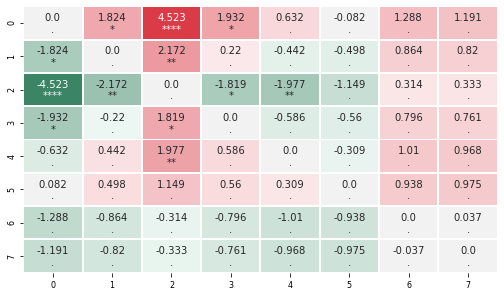

In [17]:

plt.rcParams.update({'font.size': 8}) #font size 
listA = [dft_testScore.values.T.tolist()[i] for i in range(1, len(dft_testScore.values.T.tolist()))]
listB = [dft_PeeScore.values.T.tolist()[i] for i in range(1, len(dft_PeeScore.values.T.tolist()))]
listC = [dft_StarScore.values.T.tolist()[i] for i in range(1, len(dft_StarScore.values.T.tolist()))]

for i in range(len(listA)):
    for j in range(len(listA[i])):
        #listC[i][j] = str(round(listA[i][j], 3))+'\n'+str(round(listB[i][j], 3))+'\n'+str(listC[i][j])
        listC[i][j] = str(round(listA[i][j], 3))+'\n'+str(listC[i][j])

#fig, ax = plt.subplots(figsize=(18/2.54, 11.83/2.54))
fig = plt.figure(figsize=(18/2.54,10.45/2.54)) #dt2
ax = fig.add_axes([0.05,0.07,0.93,0.9])
cmap = sns.diverging_palette(150, 10, as_cmap=True)
sns.heatmap(listA, cmap=cmap, linewidths=1, annot=listC, cbar = False, square =False, ax = ax, annot_kws={"size": 10})
plt.savefig('svm_conf.png')
